TP PYTHON

In [88]:
import pandas as pd
import numpy as np


In [89]:
cities=pd.read_csv("data/cities.csv")
population=pd.read_csv("data/Population_data.csv")

In [90]:

cities.rename(columns={'LatD':'"LatD"'},inplace=True)
cities.columns= cities.columns.str.replace('"','',regex=False)
cities.columns= cities.columns.str.replace(' ','',regex=False)
cities.head(5)

,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI


In [91]:
population.head()

,City,Population_2020,Growth_rate
0,"""Youngstown""",171958,1.684645
1,"""Yankton""",721155,1.380465
2,"""Yakima""",181932,0.542239
3,"""Worcester""",415838,1.096527
4,"""Wisconsin Dells""",309178,2.634026


1. Ajouter une colonne "Latitude totale" et "Longitude totale" dans le fichier
cities.csv


In [92]:
cities["LaT_tot"]= cities.LatD +(cities.LatM / 60)+(cities.LatS /3600 )
cities["Lon_tot"]= cities. LonD +(cities. LonM / 60)+(cities. LonS /3600 )

2. Filtrer les villes situées dans l'hémisphère Nord


In [93]:
villes_nord=cities[cities["NS"] == ' "N"']
villes_nord.head()

,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State,LaT_tot,Lon_tot
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,41.099722,80.650000
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,42.880000,97.389722
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,46.599722,120.510000
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,42.270000,71.800000
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,43.630000,89.769722


3. Fusionner les deux DataFrames sur la colonne "City"


In [94]:
merger_data=pd.merge(cities,population,on='City',how="left")
merger_data


,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State,LaT_tot,Lon_tot,Population_2020,Growth_rate
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,41.099722,80.650000,171958,1.684645
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,42.880000,97.389722,721155,1.380465
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,46.599722,120.510000,181932,0.542239
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,42.270000,71.800000,415838,1.096527
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,43.630000,89.769722,309178,2.634026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,39,31,12,"""N""",119,48,35,"""W""","""Reno""",NV,39.520000,119.809722,426896,1.066121
146,50,25,11,"""N""",104,39,0,"""W""","""Regina""",SA,50.419722,104.650000,98984,1.336614
147,40,10,48,"""N""",122,14,23,"""W""","""Red Bluff""",CA,40.180000,122.239722,352918,2.601073
148,40,19,48,"""N""",75,55,48,"""W""","""Reading""",PA,40.330000,75.930000,314712,3.039983


4. Calculer la population projetée pour 2025



In [95]:
merger_data["population_2025"]=merger_data.Population_2020*pow(1+(merger_data.Growth_rate/100),5)
merger_data

,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State,LaT_tot,Lon_tot,Population_2020,Growth_rate,population_2025
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,41.099722,80.650000,171958,1.684645,186938.717821
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,42.880000,97.389722,721155,1.380465,772324.839944
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,46.599722,120.510000,181932,0.542239,186918.318699
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,42.270000,71.800000,415838,1.096527,439142.388755
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,43.630000,89.769722,309178,2.634026,352099.498517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,39,31,12,"""N""",119,48,35,"""W""","""Reno""",NV,39.520000,119.809722,426896,1.066121,450142.563347
146,50,25,11,"""N""",104,39,0,"""W""","""Regina""",SA,50.419722,104.650000,98984,1.336614,105778.388375
147,40,10,48,"""N""",122,14,23,"""W""","""Red Bluff""",CA,40.180000,122.239722,352918,2.601073,401266.896463
148,40,19,48,"""N""",75,55,48,"""W""","""Reading""",PA,40.330000,75.930000,314712,3.039983,365546.141195


5. Afficher les villes avec une population projetée supérieure à 1 million en 2025



In [96]:
ville_projetées=merger_data[merger_data['population_2025']>1000000]
ville_projetées


,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State,LaT_tot,Lon_tot,Population_2020,Growth_rate,population_2025
15,33,54,0,"""N""",98,29,23,"""W""","""Wichita Falls""",TX,33.900000,98.489722,962756,1.612455,1.042920e+06
39,30,49,47,"""N""",83,16,47,"""W""","""Valdosta""",GA,30.829722,83.279722,967040,2.313252,1.084186e+06
42,32,20,59,"""N""",95,18,0,"""W""","""Tyler""",TX,32.349722,95.300000,920910,3.328561,1.084724e+06
52,39,2,59,"""N""",95,40,11,"""W""","""Topeka""",KS,39.049722,95.669722,955778,3.149841,1.116092e+06
57,30,27,0,"""N""",84,16,47,"""W""","""Tallahassee""",FL,30.450000,84.279722,952648,1.316397,1.017024e+06
90,44,47,59,"""N""",106,57,35,"""W""","""Sheridan""",WY,44.799722,106.959722,956606,3.493221,1.135776e+06
92,32,25,11,"""N""",87,1,11,"""W""","""Selma""",AL,32.419722,87.019722,960790,3.429845,1.137255e+06
96,41,52,11,"""N""",103,39,36,"""W""","""Scottsbluff""",NB,41.869722,103.660000,946942,2.403054,1.066321e+06
138,37,16,12,"""N""",79,56,24,"""W""","""Roanoke""",VA,37.270000,79.940000,976075,1.282488,1.040291e+06
144,45,38,23,"""N""",89,25,11,"""W""","""Rhinelander""",WI,45.639722,89.419722,887646,3.147909,1.036435e+06


6. Créer un graphique de la population projetée pour 2025


In [101]:

!pip install matplotlib


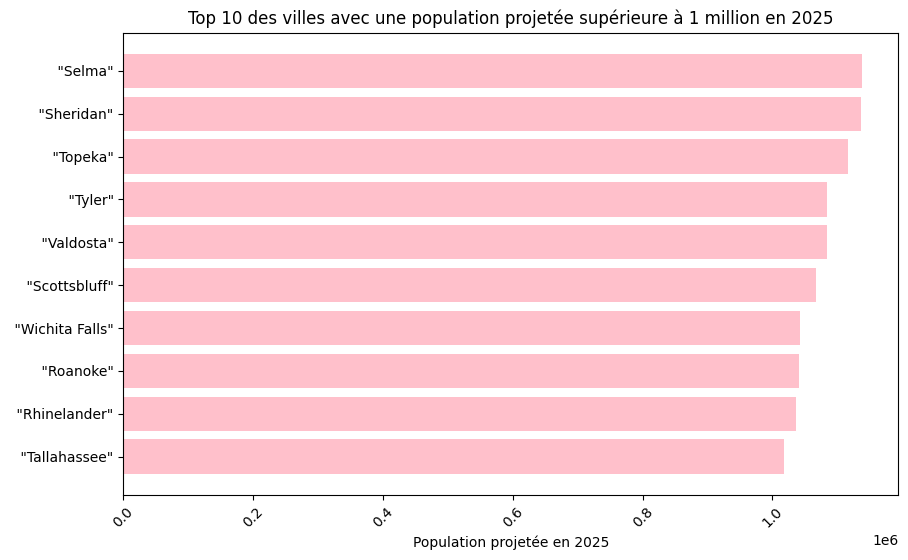

In [107]:
top_cities = ville_projetées.nlargest(10, 'population_2025')
import matplotlib.pyplot as plt
# Créer le graphique à barres
plt.figure(figsize=(10, 6))
plt.barh(top_cities['City'], top_cities['population_2025'], color='pink')
plt.xlabel('Population projetée en 2025')
plt.title('Top 10 des villes avec une population projetée supérieure à 1 million en 2025')
plt.gca().invert_yaxis()  # Inverser l'axe des y pour avoir la plus grande ville en haut

plt.xticks(rotation=45)
plt.show()

7. Calculer la densité de population des villes



In [111]:
merger_data['Area'] = np.random.rand(len(merger_data)) * 100
merger_data


,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State,LaT_tot,Lon_tot,Area
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,41.099722,80.650000,77.832381
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,42.880000,97.389722,64.745673
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,46.599722,120.510000,91.011236
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,42.270000,71.800000,48.373142
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,43.630000,89.769722,16.870194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,39,31,12,"""N""",119,48,35,"""W""","""Reno""",NV,39.520000,119.809722,22.594402
124,50,25,11,"""N""",104,39,0,"""W""","""Regina""",SA,50.419722,104.650000,60.951450
125,40,10,48,"""N""",122,14,23,"""W""","""Red Bluff""",CA,40.180000,122.239722,79.205206
126,40,19,48,"""N""",75,55,48,"""W""","""Reading""",PA,40.330000,75.930000,57.472834


In [115]:
print(merger_data.dtypes)

cities['Area'] = pd.to_numeric(cities['Area'], errors='coerce')



LatD                 int64
LatM                 int64
LatS                 int64
NS                  object
LonD                 int64
LonM                 int64
LonS                 int64
EW                  object
City                object
State               object
LaT_tot            float64
Lon_tot            float64
Population_2020      int64
Growth_rate        float64
population_2025    float64
Area               float64
dtype: object


In [119]:
merger_data['Densité_population'] = merger_data['population_2025'] / merger_data['Area']
merger_data


,LatD,LatM,LatS,NS,LonD,LonM,LonS,EW,City,State,LaT_tot,Lon_tot,Population_2020,Growth_rate,population_2025,Area,Densité_population
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH,41.099722,80.650000,171958,1.684645,186938.717821,13.445695,13903.239385
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD,42.880000,97.389722,721155,1.380465,772324.839944,1.078737,715952.603746
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA,46.599722,120.510000,181932,0.542239,186918.318699,10.306505,18135.955048
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA,42.270000,71.800000,415838,1.096527,439142.388755,54.452190,8064.733253
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI,43.630000,89.769722,309178,2.634026,352099.498517,5.203598,67664.624673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,39,31,12,"""N""",119,48,35,"""W""","""Reno""",NV,39.520000,119.809722,426896,1.066121,450142.563347,20.562111,21891.845703
146,50,25,11,"""N""",104,39,0,"""W""","""Regina""",SA,50.419722,104.650000,98984,1.336614,105778.388375,68.739194,1538.836617
147,40,10,48,"""N""",122,14,23,"""W""","""Red Bluff""",CA,40.180000,122.239722,352918,2.601073,401266.896463,75.544983,5311.628681
148,40,19,48,"""N""",75,55,48,"""W""","""Reading""",PA,40.330000,75.930000,314712,3.039983,365546.141195,95.926133,3810.704454


In [125]:
max_population_city = merger_data.loc[merger_data['Population_2020'].idxmax()]


In [124]:
min_population_city= merger_data.loc[merger_data['Population_2020'].idxmin()]

9. Filtrer les villes avec une densité de population supérieure à 5000 habitants/km²


In [126]:
merger_data.loc[merger_data["Densité_population"]>5000].City

0            "Youngstown"
1               "Yankton"
2                "Yakima"
3             "Worcester"
4       "Wisconsin Dells"
              ...        
142            "Richmond"
143           "Richfield"
144         "Rhinelander"
145                "Reno"
147           "Red Bluff"
Name: City, Length: 115, dtype: object

10. Trouver la moyenne et la médiane de la population des villes


In [127]:
merger_data.Population_2020.mean

<bound method Series.mean of 0      171958
1      721155
2      181932
3      415838
4      309178
        ...  
145    426896
146     98984
147    352918
148    314712
149    170151
Name: Population_2020, Length: 150, dtype: int64>

In [128]:
merger_data.Population_2020.median

<bound method Series.median of 0      171958
1      721155
2      181932
3      415838
4      309178
        ...  
145    426896
146     98984
147    352918
148    314712
149    170151
Name: Population_2020, Length: 150, dtype: int64>

In [130]:
merger_data['Population_normalisée'] = (merger_data['Population_2020'] - merger_data['Population_2020'].idxmin()) / (merger_data['Population_2020'].idxmax() - merger_data['Population_2020'].idxmin())


In [131]:
merger_data.describe()

,LatD,LatM,LatS,LonD,LonM,LonS,LaT_tot,Lon_tot,Population_2020,Growth_rate,population_2025,Area,Densité_population,Population_normalisée
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000
mean,38.960000,30.740000,28.020000,91.873333,28.913333,26.526667,39.480117,92.362591,476303.746667,2.010882,5.278818e+05,51.907378,24855.909820,39681.478889
std,4.913862,17.206379,19.568661,14.979313,16.687791,18.305277,4.913284,14.952929,253222.755955,0.841685,2.849158e+05,27.876686,69194.107490,21101.896330
min,26.000000,1.000000,0.000000,71.000000,0.000000,0.000000,26.719722,71.800000,73247.000000,0.501561,8.417470e+04,1.078737,948.341750,6093.416667
25%,37.000000,14.250000,11.000000,80.000000,16.000000,11.000000,37.182292,80.417292,285993.000000,1.245908,3.047939e+05,28.015318,5403.065694,23822.250000
50%,39.000000,31.500000,24.000000,89.000000,29.000000,23.500000,39.865000,89.644861,403531.000000,2.037252,4.446425e+05,53.715274,10582.736499,33617.083333
75%,42.000000,46.000000,47.000000,98.000000,41.750000,44.250000,42.754792,98.369792,697149.000000,2.633084,7.600263e+05,75.712248,17275.647327,58085.250000
max,50.000000,59.000000,59.000000,123.000000,58.000000,59.000000,50.419722,123.120000,976075.000000,3.493221,1.137255e+06,99.892738,715952.603746,81329.083333
